<a href="https://colab.research.google.com/github/rhanilham/PCVK/blob/main/Jobsheet9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

(-0.5, 514.5, 209.5, -0.5)

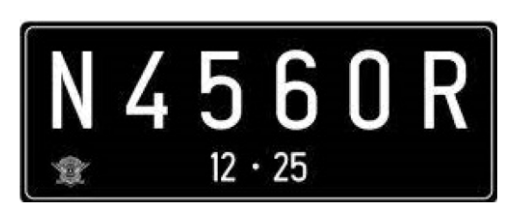

In [3]:
plat = cv2.imread("/content/drive/MyDrive/PCVK/images/plat.png",cv2.IMREAD_GRAYSCALE)
plt.imshow(plat, cmap = 'gray')
plt.axis(False)

In [4]:
cross = np.array([[0,1,0],
                  [1,1,1],
                  [0,1,0]], dtype=np.uint8)

CPU times: user 1.38 s, sys: 2.7 ms, total: 1.39 s
Wall time: 1.45 s


(-0.5, 514.5, 209.5, -0.5)

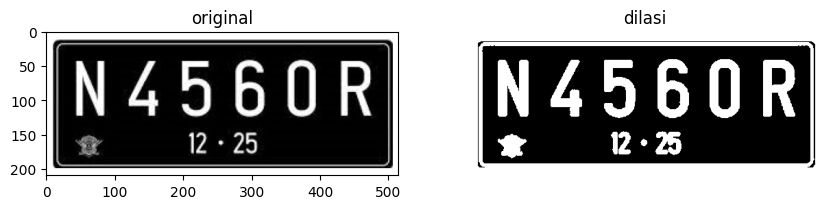

In [5]:
image_height, image_width = plat.shape
se_height, se_width = cross.shape
dilated_image = np.zeros((image_height, image_width), dtype=np.uint8)

def dilate_3x3cross():

    th, threshed = cv2.threshold(plat, 40, 255, cv2.THRESH_BINARY)
    for y in range(image_height):
        for x in range(image_width):
            if threshed[y, x] == 255:  # Check if the pixel in the input image is white (255)
                for i in range(se_height):
                    for j in range(se_width):
                        if cross[i, j] == 1:
                            # Calculate the coordinates in the input image
                            img_x = x + j - se_width // 2
                            img_y = y + i - se_height // 2

                            # Check boundaries
                            if 0 <= img_x < image_width and 0 <= img_y < image_height:
                                dilated_image[img_y, img_x] = 255

%time dilate_3x3cross()
fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].imshow(plat, cmap = 'gray')
ax[0].set_title('original')
plt.axis(False)
ax[1].imshow(dilated_image, cmap = 'gray')
ax[1].set_title('dilasi')
plt.axis(False)

CPU times: user 1.03 ms, sys: 918 µs, total: 1.95 ms
Wall time: 28.5 ms


(-0.5, 514.5, 209.5, -0.5)

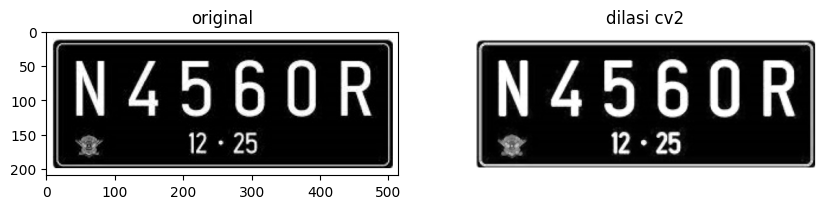

In [6]:
cross = np.array([[0, 1, 0],
                  [1, 1, 1],
                  [0, 1, 0]], dtype=np.uint8)

%time dilated_image2 = cv2.dilate(plat, cross, iterations=1)

fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].imshow(plat, cmap = 'gray')
ax[0].set_title('original')
plt.axis(False)
ax[1].imshow(dilated_image2, cmap = 'gray')
ax[1].set_title('dilasi cv2')
plt.axis(False)

CPU times: user 1.58 s, sys: 0 ns, total: 1.58 s
Wall time: 1.94 s


(-0.5, 514.5, 209.5, -0.5)

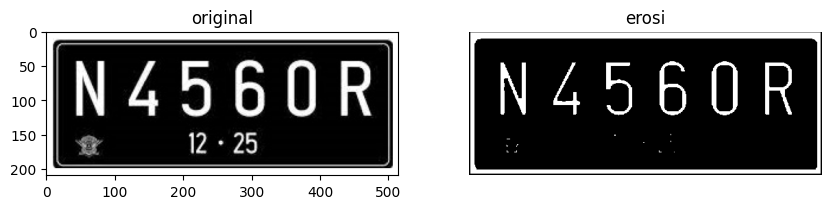

In [7]:
square = np.ones((5, 5), dtype=np.uint8)
# Get the dimensions of the image and structuring element
image_height, image_width = plat.shape
se_height, se_width = square.shape

# Create an empty output image of the same size as the input image
eroded_image = np.zeros((image_height, image_width), dtype=np.uint8)

def erote_5x5sq():
    th, threshed = cv2.threshold(plat, 100, 255, cv2.THRESH_BINARY)
    for y in range(image_height):
        for x in range(image_width):
            is_inside = True
            for i in range(se_height):
                for j in range(se_width):
                    img_x = x + j - se_width // 2
                    img_y = y + i - se_height // 2
                    if not (0 <= img_x < image_width and 0 <= img_y < image_height):
                        is_inside = False
                        break
                    if threshed[img_y, img_x] != 255:
                        is_inside = False
                        break
                if not is_inside:
                    break
            if is_inside:
                eroded_image[y, x] = 255

%time erote_5x5sq()
fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].imshow(plat, cmap = 'gray')
ax[0].set_title('original')
plt.axis(False)
ax[1].imshow(eroded_image, cmap = 'gray')
ax[1].set_title('erosi')
plt.axis(False)

CPU times: user 165 µs, sys: 24 µs, total: 189 µs
Wall time: 193 µs


(-0.5, 514.5, 209.5, -0.5)

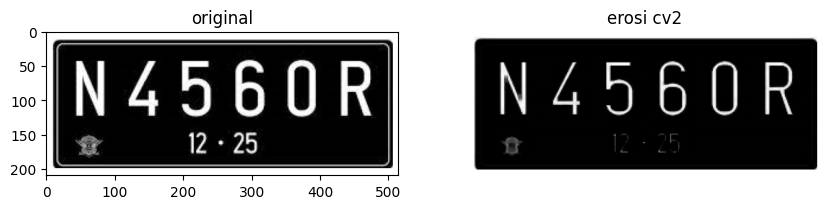

In [8]:
%time img_erosion = cv2.erode(plat, square, iterations=1)
fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].imshow(plat, cmap = 'gray')
ax[0].set_title('original')
plt.axis(False)
ax[1].imshow(img_erosion, cmap = 'gray')
ax[1].set_title('erosi cv2')
plt.axis(False)

(-0.5, 514.5, 209.5, -0.5)

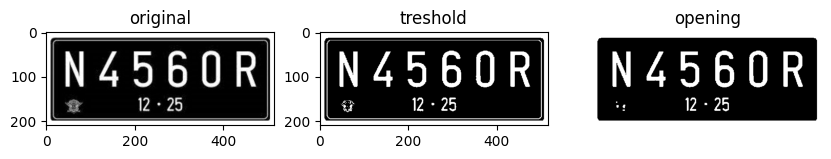

In [9]:
# Define the structuring element (3x3 square)
square = np.ones((3, 3), dtype=np.uint8)

# Get the dimensions of the image and structuring element
image_height, image_width = plat.shape
se_height, se_width = square.shape

# Create an empty output image of the same size as the input image
opened_image = np.zeros((image_height, image_width), dtype=np.uint8)
threshed = cv2.threshold(plat, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# Perform erosion manually using the square structuring element
for y in range(image_height):
    for x in range(image_width):
        is_inside = True
        for i in range(se_height):
            for j in range(se_width):
                img_x = x + j - se_width // 2
                img_y = y + i - se_height // 2
                if not (0 <= img_x < image_width and 0 <= img_y < image_height):
                    is_inside = False
                    break
                if threshed[img_y, img_x] != 255:
                    is_inside = False
                    break
            if not is_inside:
                break
        if is_inside:
            opened_image[y, x] = 255

# Define the structuring element for dilation (3x3 square)
square = np.ones((3, 3), dtype=np.uint8)

# Get the dimensions of the image and structuring element
se_height, se_width = square.shape

# Create an empty output image for dilation
dilated_image = np.zeros((image_height, image_width), dtype=np.uint8)

# Perform dilation manually using the square structuring element
for y in range(image_height):
    for x in range(image_width):
        if opened_image[y, x] == 255:  # Check if the pixel in the opened image is white (255)
            for i in range(se_height):
                for j in range(se_width):
                    img_x = x + j - se_width // 2
                    img_y = y + i - se_height // 2
                    if 0 <= img_x < image_width and 0 <= img_y < image_height:
                        dilated_image[img_y, img_x] = 255

fig, ax = plt.subplots(1, 3, figsize=(10,5))

ax[0].imshow(plat, cmap = 'gray')
ax[0].set_title('original')
plt.axis(False)
ax[1].imshow(threshed, cmap = 'gray')
ax[1].set_title('treshold')
plt.axis(False)
ax[2].imshow(dilated_image, cmap = 'gray')
ax[2].set_title('opening')
plt.axis(False)

(-0.5, 514.5, 209.5, -0.5)

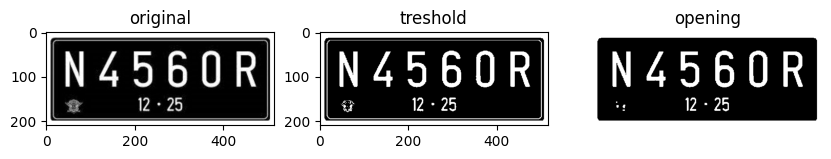

In [10]:
# binarize the image
binr = cv2.threshold(plat, 0, 255,
                     cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# define the kernel
kernel = np.ones((3, 3), np.uint8)

# opening the image
opening = cv2.morphologyEx(binr, cv2.MORPH_OPEN,
                           kernel, iterations=1)
# print the output
fig, ax = plt.subplots(1, 3, figsize=(10,5))
ax[0].imshow(plat, cmap = 'gray')
ax[0].set_title('original')
plt.axis(False)
ax[1].imshow(binr, cmap = 'gray')
ax[1].set_title('treshold')
plt.axis(False)
ax[2].imshow(opening, cmap = 'gray')
ax[2].set_title('opening')
plt.axis(False)

(-0.5, 514.5, 209.5, -0.5)

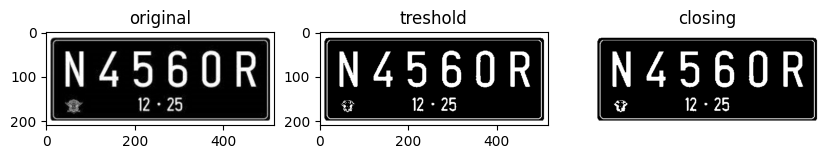

In [11]:
binr = cv2.threshold(plat, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# define the kernel
kernel = np.ones((3, 3), np.uint8)

# opening the image
closing = cv2.morphologyEx(binr, cv2.MORPH_CLOSE, kernel, iterations=1)

# print the output
fig, ax = plt.subplots(1, 3, figsize=(10,5))
ax[0].imshow(plat, cmap = 'gray')
ax[0].set_title('original')
plt.axis(False)
ax[1].imshow(binr, cmap = 'gray')
ax[1].set_title('treshold')
plt.axis(False)
ax[2].imshow(closing, cmap = 'gray')
ax[2].set_title('closing')
plt.axis(False)

(-0.5, 514.5, 209.5, -0.5)

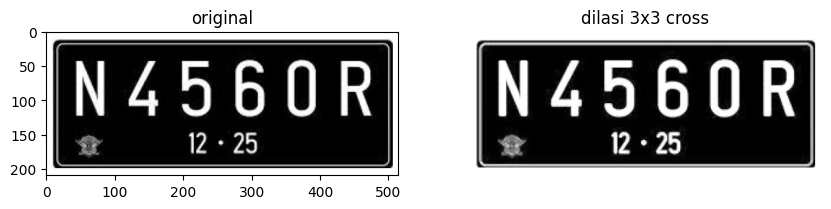

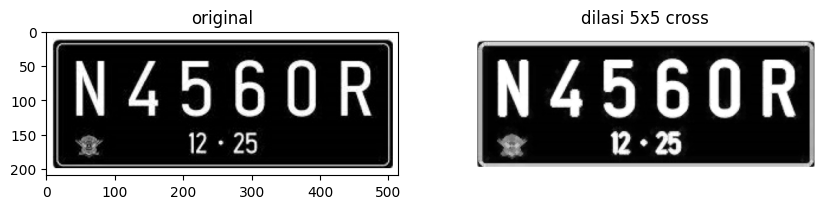

In [12]:
cross = np.array([[0, 1, 0],
                  [1, 1, 1],
                  [0, 1, 0]], dtype=np.uint8)

dilated_image2 = cv2.dilate(plat, cross, iterations=1)

fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].imshow(plat, cmap = 'gray')
ax[0].set_title('original')
plt.axis(False)
ax[1].imshow(dilated_image2, cmap = 'gray')
ax[1].set_title('dilasi 3x3 cross')
plt.axis(False)

cross = np.array([[0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0],
                  [1, 1, 1, 1, 1],
                  [0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0]], dtype=np.uint8)

dilated_image2 = cv2.dilate(plat, cross, iterations=1)

fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].imshow(plat, cmap = 'gray')
ax[0].set_title('original')
plt.axis(False)
ax[1].imshow(dilated_image2, cmap = 'gray')
ax[1].set_title('dilasi 5x5 cross')
plt.axis(False)

(-0.5, 514.5, 209.5, -0.5)

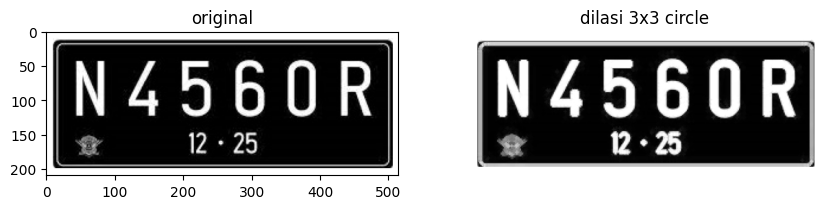

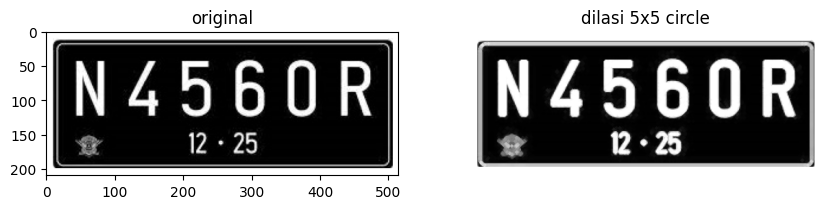

In [13]:
circle = np.array([[0, 1, 0],
                  [1, 1, 1],
                  [0, 1, 0]], dtype=np.uint8)

dilated_image2 = cv2.dilate(plat, cross, iterations=1)

fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].imshow(plat, cmap = 'gray')
ax[0].set_title('original')
plt.axis(False)
ax[1].imshow(dilated_image2, cmap = 'gray')
ax[1].set_title('dilasi 3x3 circle')
plt.axis(False)

circle = np.array([[0, 0, 1, 0, 0],
                  [0, 1, 1, 1, 0],
                  [1, 1, 1, 1, 1],
                  [0, 1, 1, 1, 0],
                  [0, 0, 1, 0, 0]], dtype=np.uint8)

dilated_image2 = cv2.dilate(plat, circle, iterations=1)

fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].imshow(plat, cmap = 'gray')
ax[0].set_title('original')
plt.axis(False)
ax[1].imshow(dilated_image2, cmap = 'gray')
ax[1].set_title('dilasi 5x5 circle')
plt.axis(False)

(-0.5, 514.5, 209.5, -0.5)

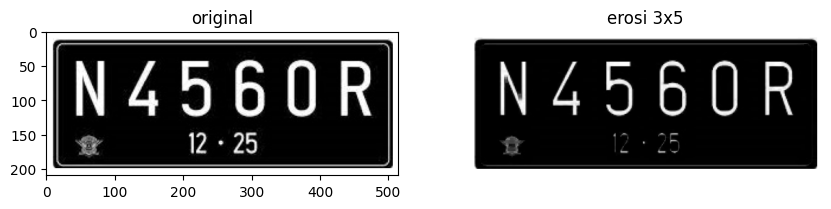

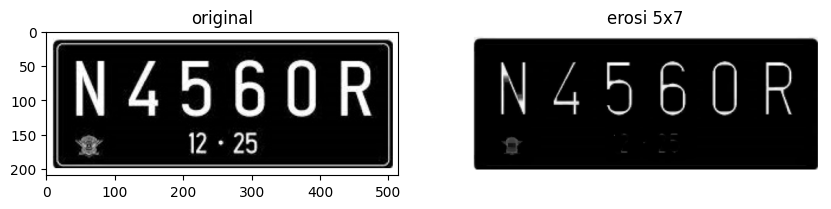

In [14]:
square = np.ones((3, 5), dtype=np.uint8)

img_erosion = cv2.erode(plat, square, iterations=1)
fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].imshow(plat, cmap = 'gray')
ax[0].set_title('original')
plt.axis(False)
ax[1].imshow(img_erosion, cmap = 'gray')
ax[1].set_title('erosi 3x5')
plt.axis(False)

square = np.ones((5, 7), dtype=np.uint8)

img_erosion = cv2.erode(plat, square, iterations=1)
fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].imshow(plat, cmap = 'gray')
ax[0].set_title('original')
plt.axis(False)
ax[1].imshow(img_erosion, cmap = 'gray')
ax[1].set_title('erosi 5x7')
plt.axis(False)

(-0.5, 514.5, 209.5, -0.5)

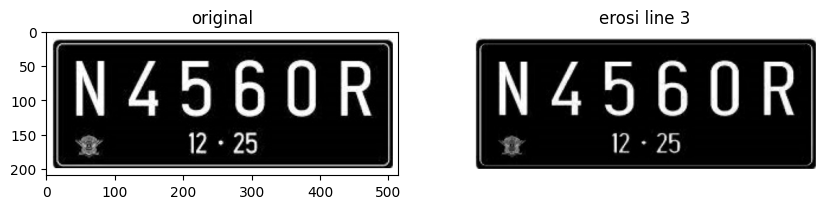

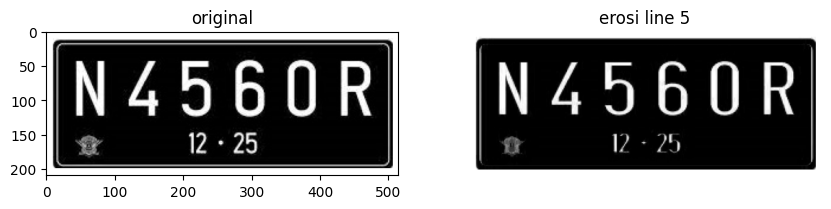

In [15]:
line = np.array([[0, 1, 0],
                  [0, 1, 0],
                  [0, 1, 0]], dtype=np.uint8)

img_erosion = cv2.erode(plat, line, iterations=1)
fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].imshow(plat, cmap = 'gray')
ax[0].set_title('original')
plt.axis(False)
ax[1].imshow(img_erosion, cmap = 'gray')
ax[1].set_title('erosi line 3')
plt.axis(False)

line = np.array([[0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0]], dtype=np.uint8)

img_erosion = cv2.erode(plat, line, iterations=1)
fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].imshow(plat, cmap = 'gray')
ax[0].set_title('original')
plt.axis(False)
ax[1].imshow(img_erosion, cmap = 'gray')
ax[1].set_title('erosi line 5')
plt.axis(False)

(-0.5, 669.5, 626.5, -0.5)

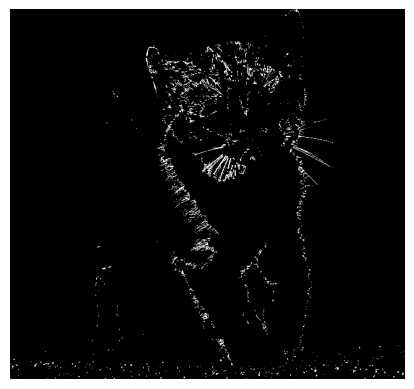

In [16]:
# read the image
img = cv2.imread("/content/drive/MyDrive/PCVK/images/kitten01.jpg", 0)

# binarize the image
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# define the kernel
kernel = np.ones((3, 3), np.uint8)

# use morph gradient
morph_gradient = cv2.morphologyEx(binr,
                                  cv2.MORPH_TOPHAT,
                                  kernel)
# print the output
plt.imshow(morph_gradient, cmap='gray')
plt.axis("off")


(-0.5, 669.5, 626.5, -0.5)

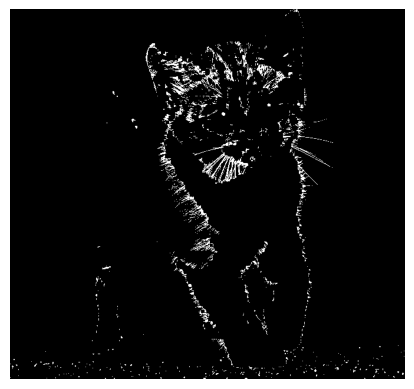

In [18]:
# invert the image
invert = cv2.bitwise_not(binr)
kernel = np.ones((5, 5), np.uint8)
# use morph gradi5nt
morph_gradient = cv2.morphologyEx(invert,
                                  cv2.MORPH_BLACKHAT,
                                  kernel)
# print the output
plt.imshow(morph_gradient, cmap='gray')
plt.axis("off")

(-0.5, 622.5, 598.5, -0.5)

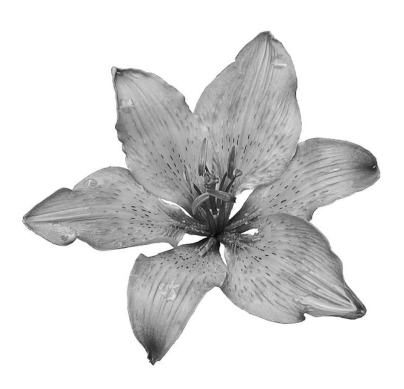

In [20]:
lily = cv2.imread("/content/drive/MyDrive/PCVK/images/lily.jpg", 0)
plt.imshow(lily, cmap='gray')
plt.axis("off")

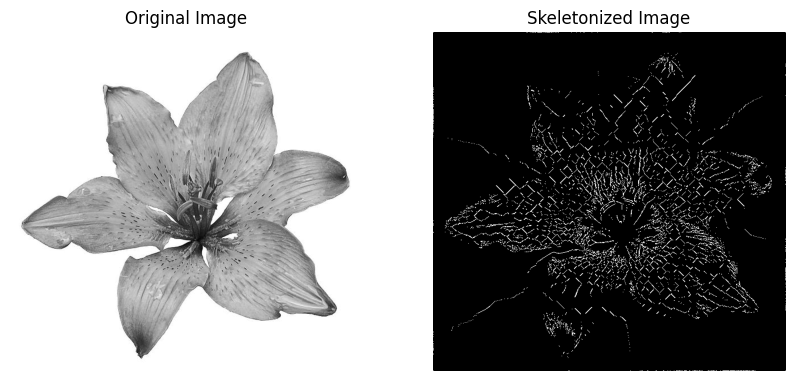

In [21]:
size = np.size(lily)
skel = np.zeros(lily.shape,np.uint8)

ret,img = cv2.threshold(lily,127,255,0)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False

while( not done):
    eroded = cv2.erode(img,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img,temp)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()

    zeros = size - cv2.countNonZero(img)
    if zeros==size:
        done = True
# Display the original and skeletonized images
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(lily, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(122)
plt.imshow(skel, cmap='gray')
plt.title("Skeletonized Image")
plt.axis("off")

plt.show()

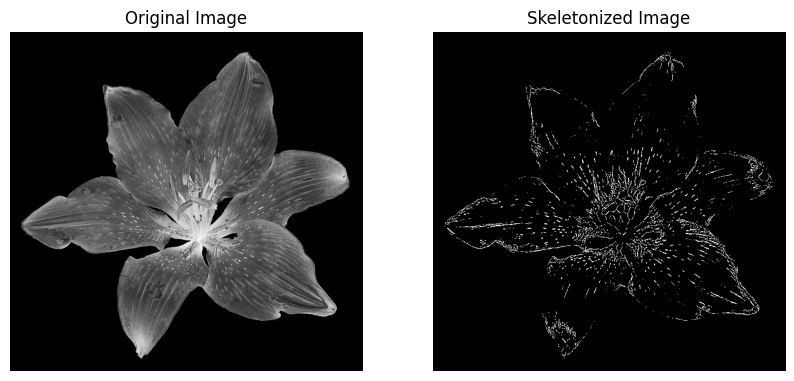

In [22]:
size = np.size(lily)
skel = np.zeros(lily.shape,np.uint8)
lily = 255 - lily
ret,img = cv2.threshold(lily,127,255,0)

element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False

while( not done):
    eroded = cv2.erode(img,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img,temp)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()

    zeros = size - cv2.countNonZero(img)
    if zeros==size:
        done = True
# Display the original and skeletonized images
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(lily, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(122)
plt.imshow(skel, cmap='gray')
plt.title("Skeletonized Image")
plt.axis("off")

plt.show()

# TUGAS

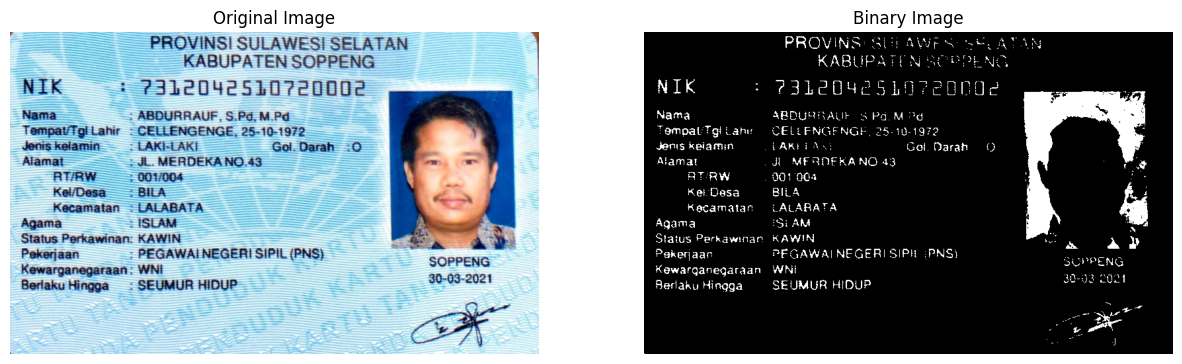

In [23]:
ktp = cv2.imread("/content/drive/MyDrive/PCVK/images/KTP/KTP7.jpeg")
ktp_bw = cv2.cvtColor(ktp,cv2.COLOR_BGR2GRAY)
equ = cv2.equalizeHist(ktp_bw)
ret,binr = cv2.threshold(equ,20,255,0)
binr = 255 - binr
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(ktp,cv2.COLOR_BGR2RGB), cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(122)
plt.imshow(binr, cmap='gray')
plt.title("Binary Image")
plt.axis("off")

plt.show()

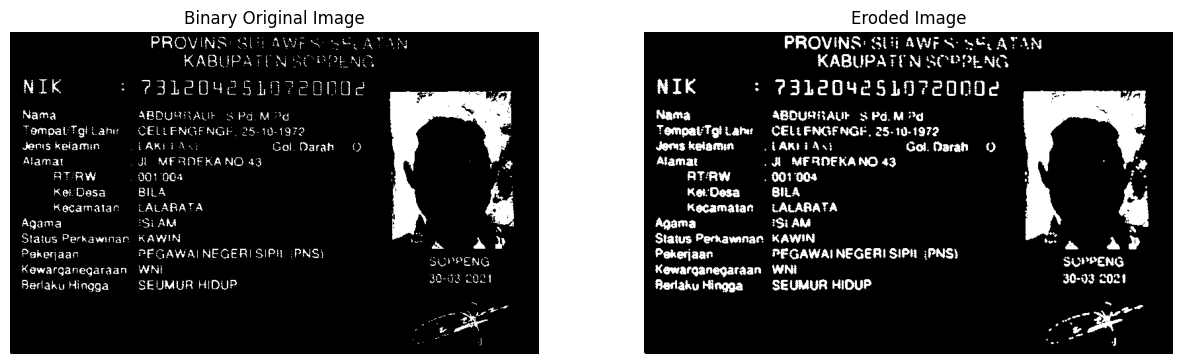

In [24]:
# define the kernel

line = np.array([[0, 1, 0],
                  [1, 1, 1],
                  [0, 1, 0]], dtype=np.uint8)

img_erosion = cv2.dilate(binr, line, iterations=1)

# Display the original and skeletonized images
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(binr, cmap='gray')
plt.title("Binary Original Image")
plt.axis("off")

plt.subplot(122)
plt.imshow(img_erosion, cmap='gray')
plt.title("Eroded Image")
plt.axis("off")

plt.show()